In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import *
import math as m
import warnings
warnings.filterwarnings('ignore')
import os,sys

In [2]:
data = pd.read_csv('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
pd.set_option('display.max_columns',26)

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
data['pcv'] = data['pcv'].astype(float,errors='ignore')


In [8]:
data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [9]:
data['classification']=data['classification'].replace({'ckd':1,'notckd':0,'ckd\t':1})

In [10]:
data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [11]:
data['cad']=data['cad'].replace('\tno','no')

data['dm']=data['dm'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'})

data['rc']=data['rc'].replace('\t?',np.nan)
data['rc']=pd.to_numeric(data['rc'])

data['wc']=data['wc'].replace({'\t8400':'8400','\t6200':'6200','\t?':np.nan})
data['wc']=pd.to_numeric(data['wc'])

data['pcv'] = data['pcv'].apply(lambda x: '43' if x=='\t43' else x)
data['pcv'] = data['pcv'].apply(lambda x: np.nan if x=='\t?' else x)
data['pcv']=pd.to_numeric(data['pcv'])

In [12]:
data['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [14]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
for i in list(data.select_dtypes(include=["object"]).columns):
    data[i] = data[i].fillna(data[i].mode()[0])

In [16]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

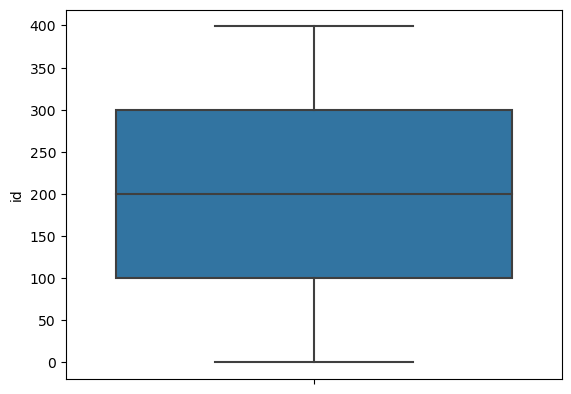

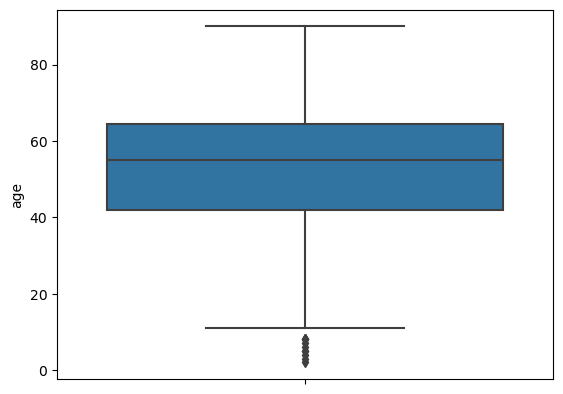

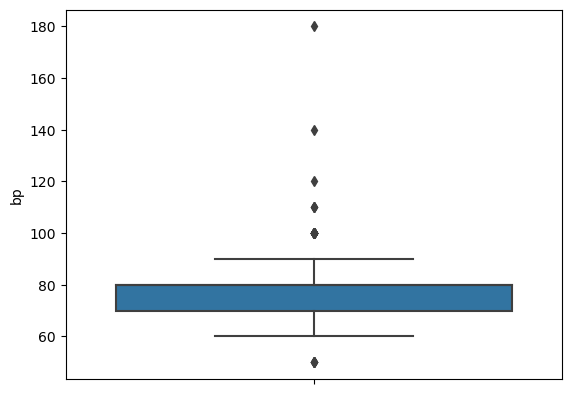

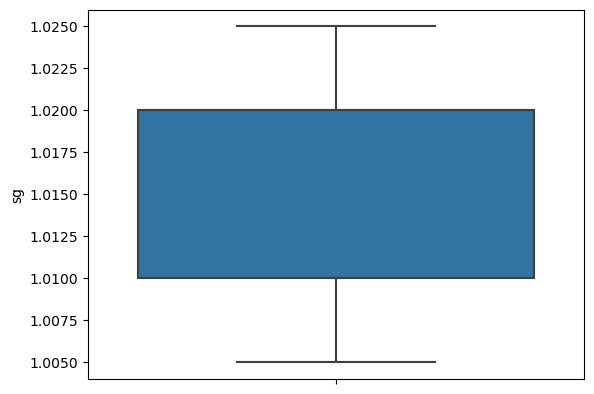

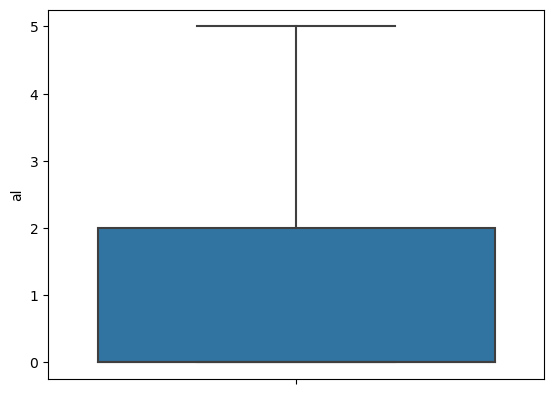

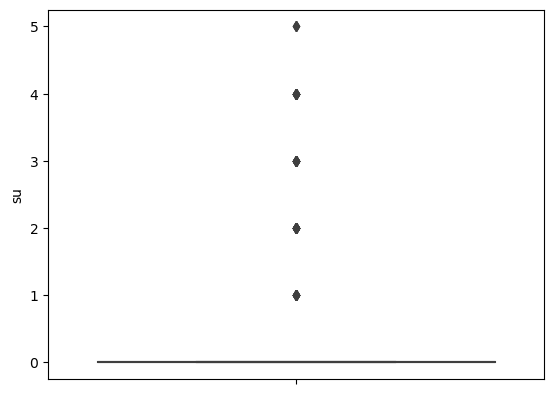

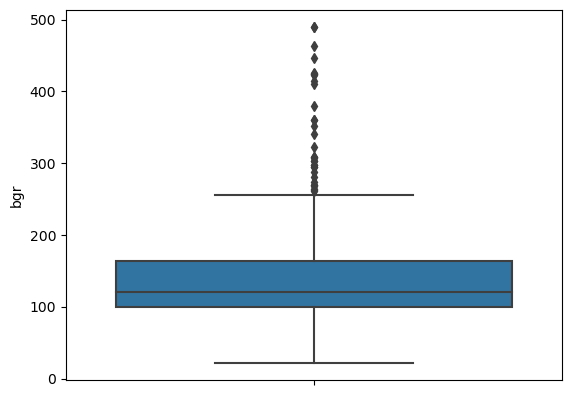

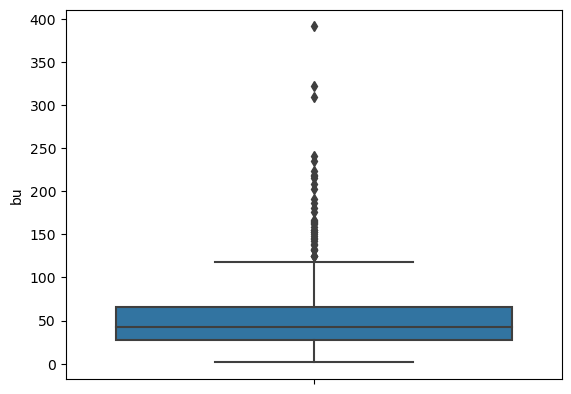

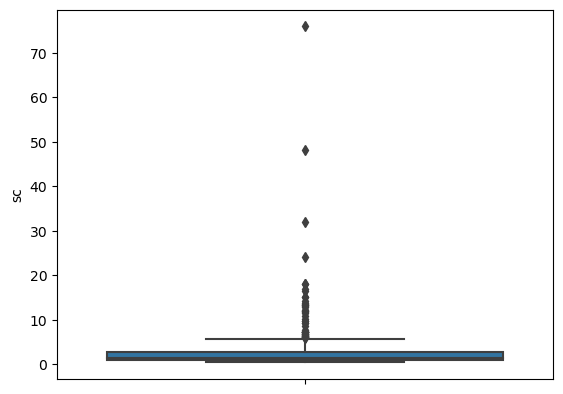

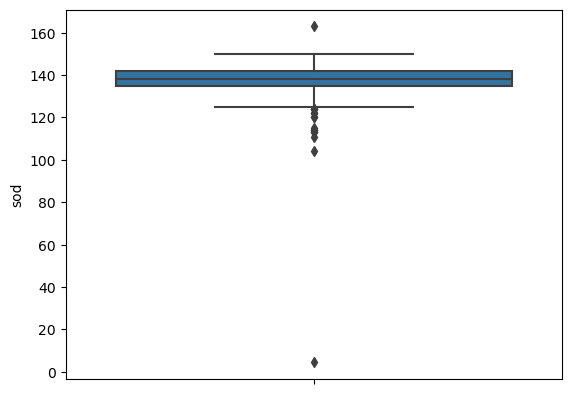

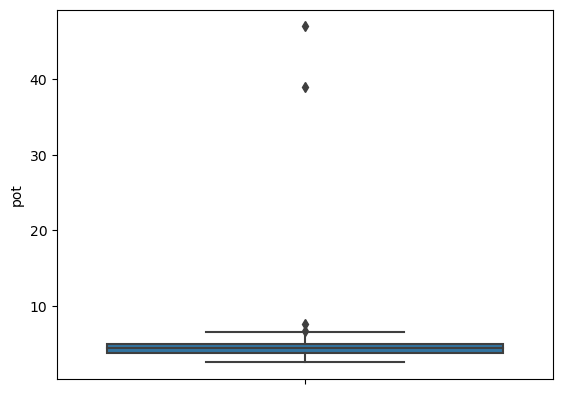

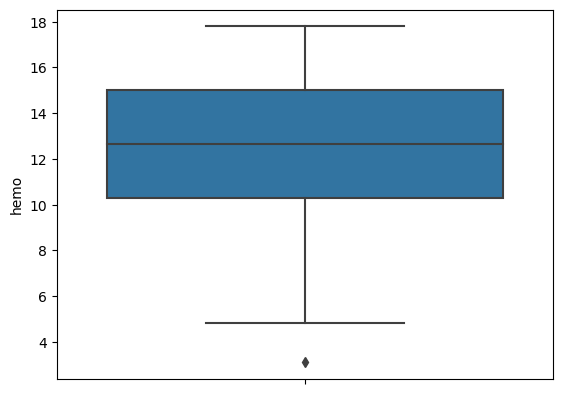

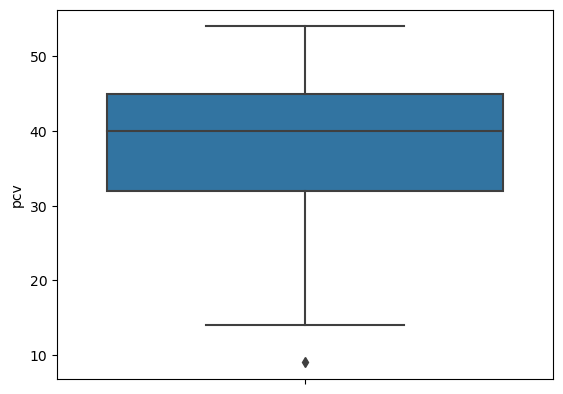

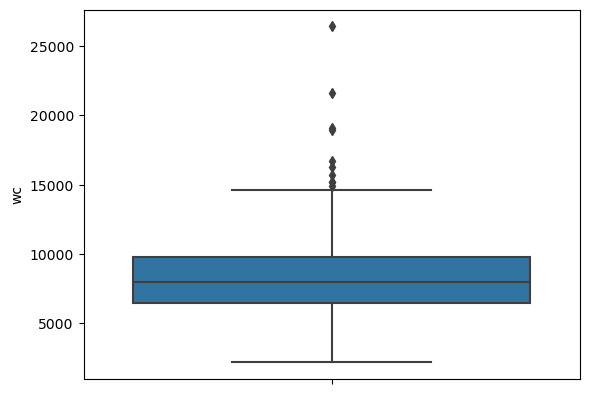

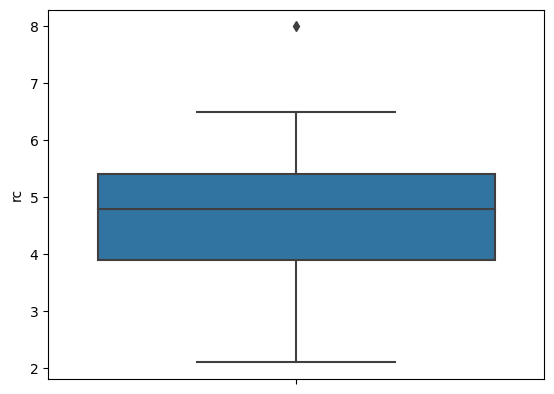

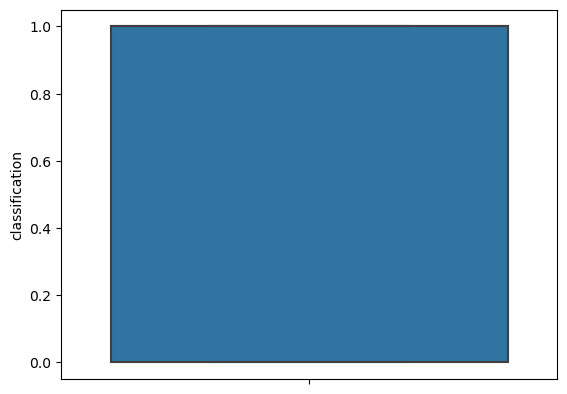

In [17]:
def boxplot(cols):
    sns.boxplot(y=data[cols])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns):
    boxplot(i)
    

In [18]:
def missing_numeric():
    out=[]
    for i in data.select_dtypes(exclude=['object']).columns:
        q1=data[i].quantile(.25)
        q3=data[i].quantile(.75)
        iqr=q3-q1
        posout=q3+1.5*iqr
        negout=q1-1.5*iqr
        
        for x in data[i]:
            if x> posout or x<negout:
                out.append(x)
            else:
                continue
        
        if len(out)>0:
            data[i+'_new']=data[i].fillna(data[i].median())
            out.clear()
            data.drop(columns=[i],inplace=True)
        else:
            data[i+'_new']=data[i].fillna(data[i].mean())
            data.drop(columns=[i],inplace=True)
    
    return data

In [19]:
missing_numeric()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,id_new,age_new,bp_new,sg_new,al_new,su_new,bgr_new,bu_new,sc_new,sod_new,pot_new,hemo_new,pcv_new,wc_new,rc_new,classification_new
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,1
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0


In [20]:
data.isna().sum()/len(data)*100

rbc                   0.0
pc                    0.0
pcc                   0.0
ba                    0.0
htn                   0.0
dm                    0.0
cad                   0.0
appet                 0.0
pe                    0.0
ane                   0.0
id_new                0.0
age_new               0.0
bp_new                0.0
sg_new                0.0
al_new                0.0
su_new                0.0
bgr_new               0.0
bu_new                0.0
sc_new                0.0
sod_new               0.0
pot_new               0.0
hemo_new              0.0
pcv_new               0.0
wc_new                0.0
rc_new                0.0
classification_new    0.0
dtype: float64

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,id_new,age_new,bp_new,sg_new,al_new,su_new,bgr_new,bu_new,sc_new,sod_new,pot_new,hemo_new,pcv_new,wc_new,rc_new,classification_new
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,1
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0


In [24]:
data['classification_new'].value_counts()

1    250
0    150
Name: classification_new, dtype: int64

In [26]:
data.drop(columns=['id_new'],axis=1,inplace=True)

In [31]:
data=pd.get_dummies(data,columns=list(data.select_dtypes(include=object).columns),drop_first=True)
data.shape

(400, 25)

In [30]:
x=data.drop(['classification_new'],axis=1)
y=data['classification_new']

In [32]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.2,random_state=17)

In [33]:
ss=sk.preprocessing.StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# grid search cv

In [52]:
param_dist = {'max_depth': [1,2,3,4,5,6,7,8],
              'min_samples_leaf': [2,3,4,5,6,7,8,10],
              'min_samples_split':[15,20,25,30,35,40,45,50,51,52],
              'criterion': ['gini','entropy']}
search= sk.model_selection.GridSearchCV(dt,cv=10,param_grid=param_dist,n_jobs=1).fit(x_train,y_train)
search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 51}

# Decesion Tree

In [146]:
dt = sk.tree.DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=35,min_samples_leaf=2).fit(x_train,y_train)
train_scr=dt.score(x_train,y_train)
test_scr=dt.score(x_test,y_test)
predict = dt.predict(x_test)
pred_train = dt.predict(x_train)
accuracy_dt=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))


TRAIN               precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.99      0.99      0.99       200

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

TEST               precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.96      0.96      0.96        50

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [60]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

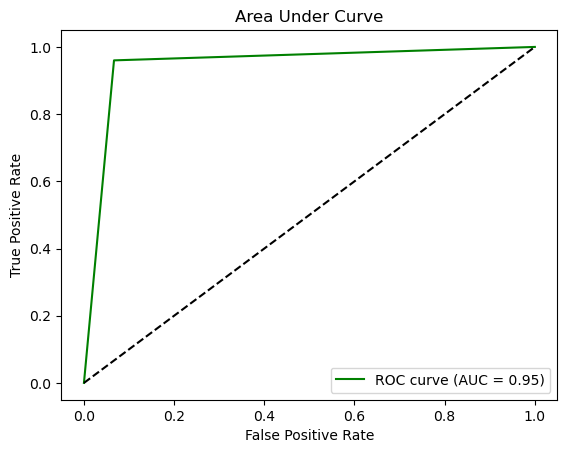

In [61]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
con=sk.metrics.confusion_matrix(predict,y_test)
con

array([[28,  2],
       [ 2, 48]], dtype=int64)

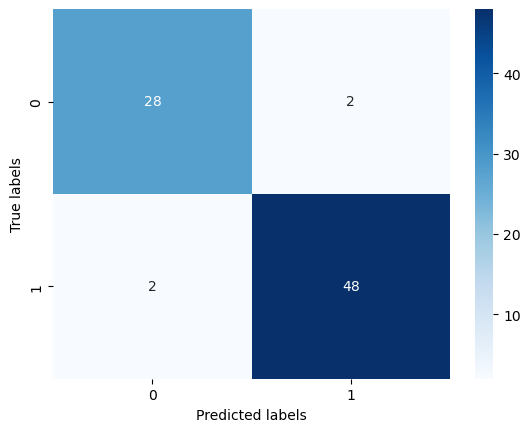

In [63]:
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [66]:
rf=sk.ensemble.RandomForestClassifier().fit(x_train,y_train)

In [73]:
param_dist = {'max_depth': [2,3,5],
              'min_samples_leaf': [2,3,4],
              'min_samples_split':[45,50,51,52],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini','entropy']
             }
search= sk.model_selection.GridSearchCV(rf,cv=10,param_grid=param_dist).fit(x_train,y_train)
search.best_params_ 

KeyboardInterrupt: 

In [74]:
oob_error_rates = []
for i in range(50,200):
    rf=sk.ensemble.RandomForestClassifier(n_estimators=i,oob_score=True,warm_start=True,random_state=42).fit(x_train,y_train)
    oob_error = 1 - rf.oob_score_
    oob_error_rates.append(oob_error)

In [75]:
oob_series=pd.Series(oob_error_rates)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 50 to 200 trees)')

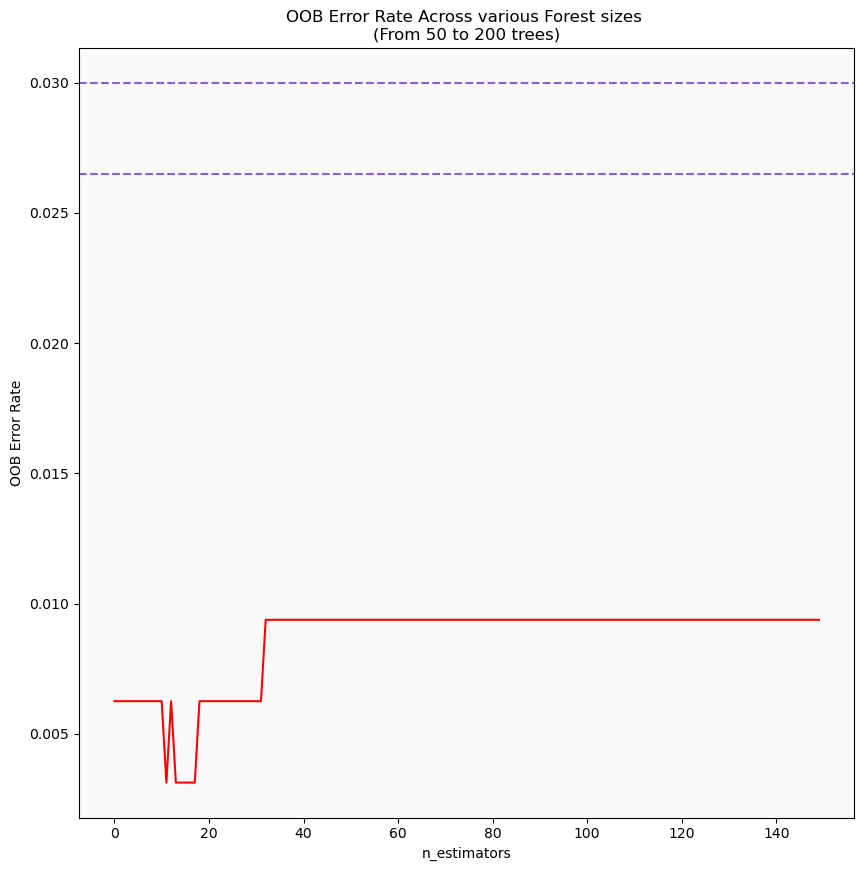

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.030, color='#875FDB',linestyle='--')
plt.axhline(0.0265, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 50 to 200 trees)')

In [78]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[21]))

OOB Error rate for 400 trees is: 0.00625


In [145]:
rf=sk.ensemble.RandomForestClassifier(n_estimators=21,criterion='gini',max_depth=10,min_samples_split=15,
    min_samples_leaf=5,bootstrap=True,max_features='auto').fit(x_train,y_train)
train_acc = rf.score(x_train, y_train)
test_acc=data_train.score(x_test, y_test)
predict = rf.predict(x_test)
pred_train = rf.predict(x_train)
accuracy_rf=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))


TRAIN               precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.99      1.00      1.00       200

    accuracy                           0.99       320
   macro avg       1.00      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

TEST               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [104]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

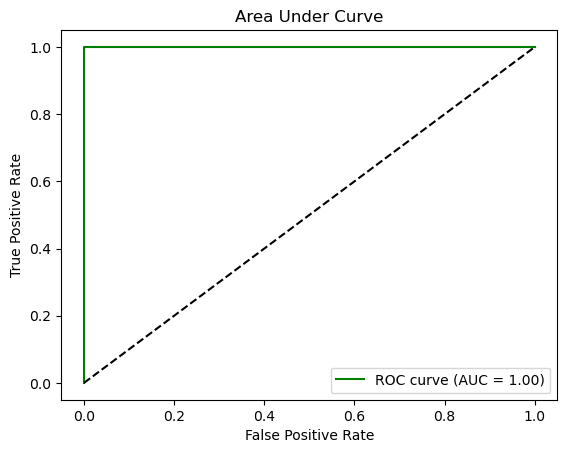

In [105]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [106]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[30  0]
 [ 0 50]]


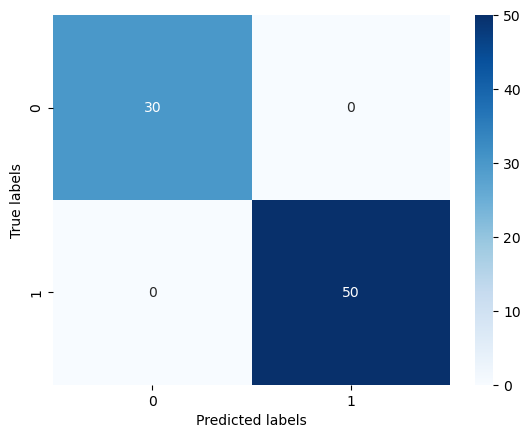

In [107]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

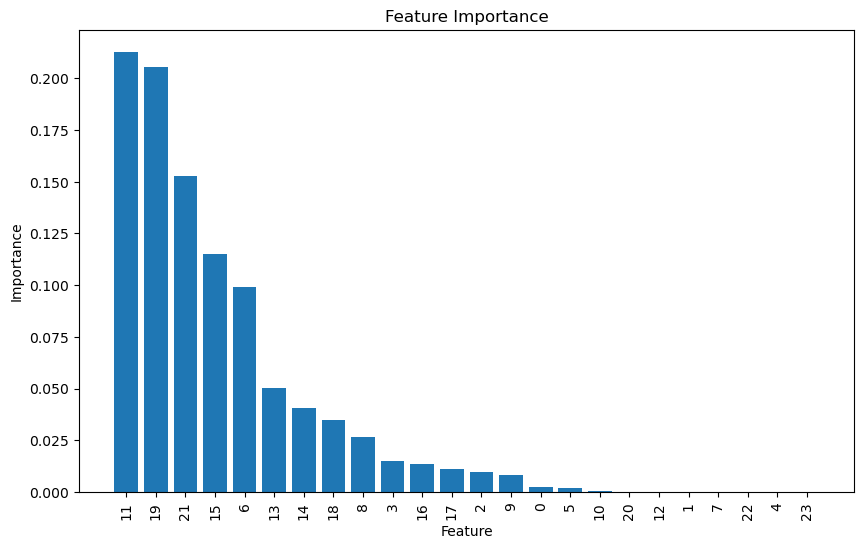

In [108]:
importances = rf.feature_importances_

# Get feature names
feature_names = np.argsort(importances)[::-1] 

# Check if the length of feature_names matches the number of features
if len(feature_names) != len(importances):
    raise ValueError("Number of feature names does not match the number of features")

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [98]:
svm= sk.svm.SVC().fit(x_train,y_train)

In [102]:
param_grid = {'C': [0.003,0.005,0.007,0.009,0.1,0.3],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']}

# Perform grid search CV
grid_search = sk.model_selection.GridSearchCV(svm, param_grid=param_grid, cv=10).fit(x_train,y_train)
grid_search.best_params_


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [144]:
svm= sk.svm.SVC(C=0.1,gamma='scale',kernel='linear',random_state=45).fit(x_train,y_train)
train_acc = svm.score(x_train, y_train)
test_acc=svm.score(x_test, y_test)
predict = svm.predict(x_test)
pred_train = svm.predict(x_train)
accuracy_svm=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))


TRAIN               precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      0.99      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

TEST               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [111]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

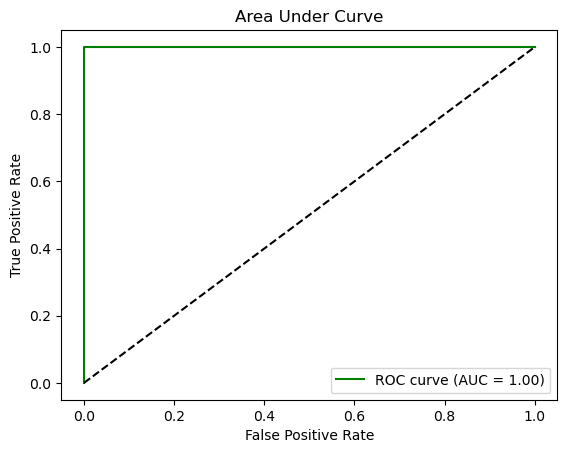

In [112]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [113]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[30  0]
 [ 0 50]]


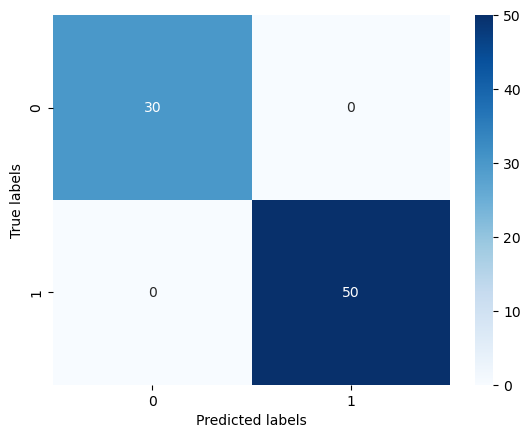

In [114]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [143]:
knn=sk.neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='auto').fit(x_train,y_train)
train_acc = knn.score(x_train, y_train)
test_acc=knn.score(x_test, y_test)
predict = knn.predict(x_test)
pred_train = knn.predict(x_train)
accuracy_knn=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))

TRAIN               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

TEST               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [116]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

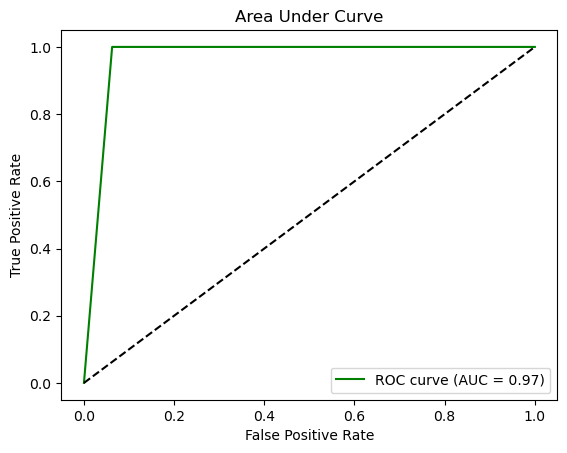

In [117]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [118]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[30  2]
 [ 0 48]]


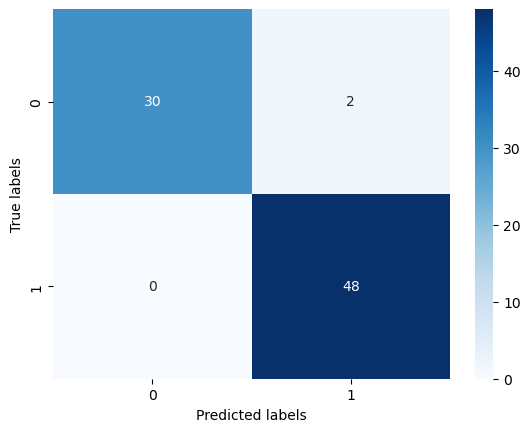

In [119]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [142]:
lr=sk.linear_model.LogisticRegression(random_state=45).fit(x_train,y_train)
train_acc = lr.score(x_train, y_train)
test_acc=lr.score(x_test, y_test)
predict = lr.predict(x_test)
pred_train = lr.predict(x_train)
accuracy_lr=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))

TRAIN               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

TEST               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [123]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

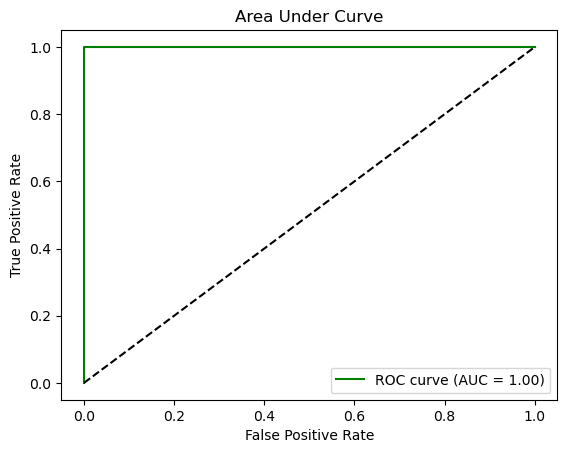

In [124]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [125]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[30  0]
 [ 0 50]]


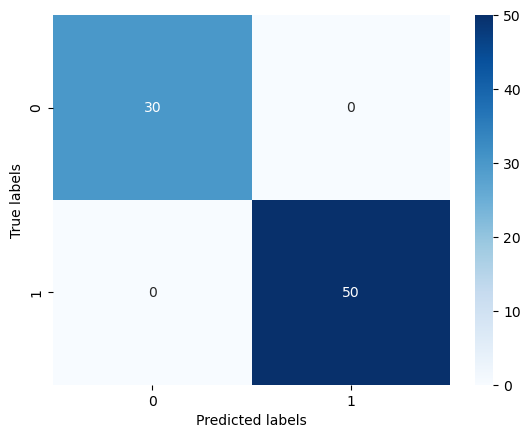

In [126]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [141]:
bnb=sk.naive_bayes.BernoulliNB().fit(x_train,y_train)
train_acc = bnb.score(x_train, y_train)
test_acc=bnb.score(x_test, y_test)
predict = bnb.predict(x_test)
pred_train = bnb.predict(x_train)
accuracy_bnb=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))

TRAIN               precision    recall  f1-score   support

           0       0.90      1.00      0.94       120
           1       1.00      0.93      0.96       200

    accuracy                           0.96       320
   macro avg       0.95      0.97      0.95       320
weighted avg       0.96      0.96      0.96       320

TEST               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [128]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

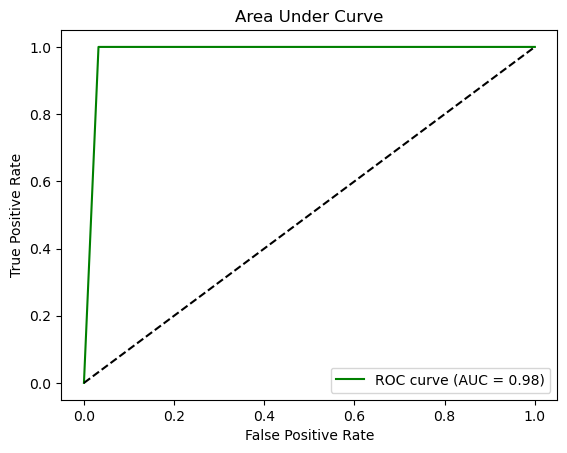

In [129]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [130]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[30  1]
 [ 0 49]]


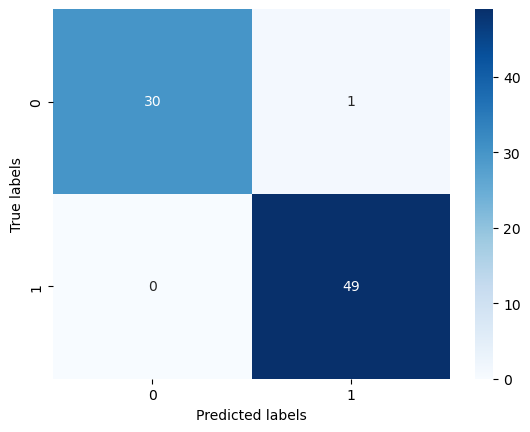

In [131]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [140]:
gnb=sk.naive_bayes.GaussianNB().fit(x_train,y_train)
train_acc = gnb.score(x_train, y_train)
test_acc=gnb.score(x_test, y_test)
predict = gnb.predict(x_test)
pred_train = gnb.predict(x_train)
accuracy_gnb=accuracy_score(y_test,predict)
print('TRAIN' , classification_report(y_train,pred_train))
print('TEST' , classification_report(y_test,predict))

TRAIN               precision    recall  f1-score   support

           0       0.89      1.00      0.94       120
           1       1.00      0.93      0.96       200

    accuracy                           0.95       320
   macro avg       0.94      0.96      0.95       320
weighted avg       0.96      0.95      0.95       320

TEST               precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       1.00      0.88      0.94        50

    accuracy                           0.93        80
   macro avg       0.92      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



In [133]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

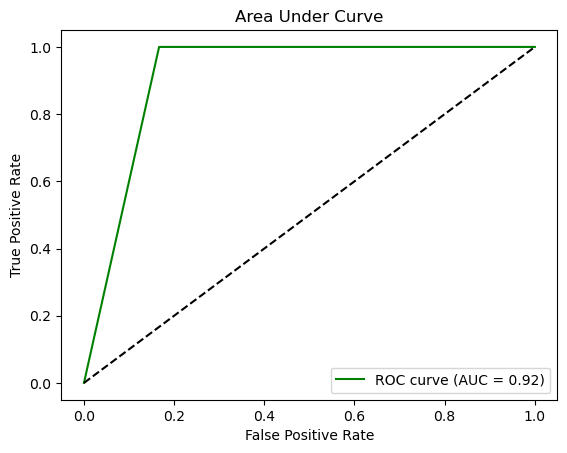

In [134]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [135]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[30  6]
 [ 0 44]]


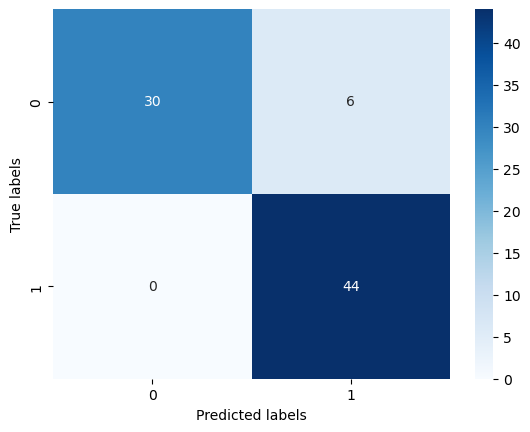

In [136]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [139]:
evc = sk.ensemble.VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RF', rf),
                                     ('SVC', svm), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True,).fit(x_train, y_train)
# prediction
pred_evc = evc.predict(x_test)
pred_train = evc.predict(x_train)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)
accuracy_evc

1.0

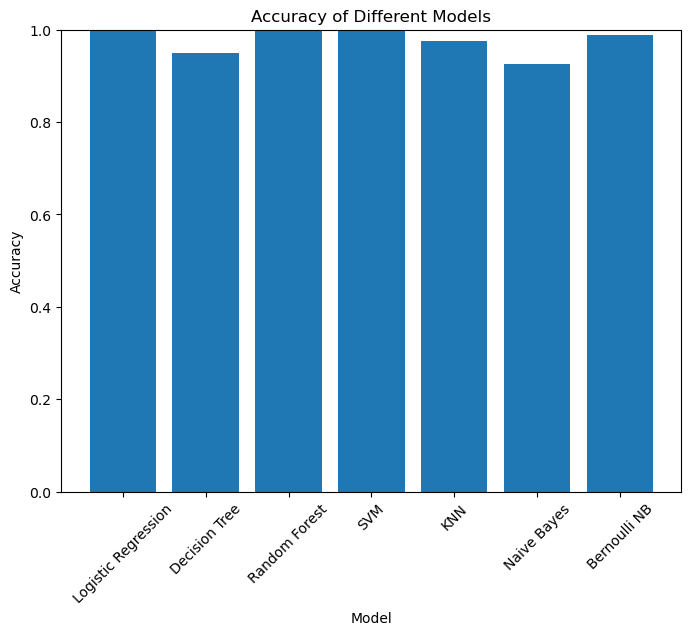

In [147]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Bernoulli NB']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn, accuracy_gnb, accuracy_bnb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim([0, 1])

plt.show()